In [ ]:
#Importing libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
from sklearn import metrics
from sklearn.metrics import classification_report, roc_curve, auc, roc_auc_score, RocCurveDisplay
from scipy import interp
from itertools import cycle

In [ ]:
#Setting display columns
pd.set_option('display.max_columns', None)

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Read dataset

df = pd.read_excel('/content/drive/MyDrive/Data Penelitian/Data penelitian.xlsx')
df.head()

,parameter_cuaca,lokasi,waktu,suhu_udara_minimum,suhu_udara_maksimum,kelembapan_udara_minimum,kelembapan_udara_maksimum,kelembapan_udara,suhu_udara,arah_angin,kecepatan_angin
0,Berawan,Parakan,00:00:00,NaN,NaN,NaN,NaN,85,26,SW,20
1,Berawan,Parakan,03:00:00,NaN,NaN,NaN,NaN,80,28,SW,20
2,Hujan lebat,Parakan,06:00:00,NaN,NaN,NaN,NaN,70,30,SW,20
3,Hujan lebat,Parakan,09:00:00,NaN,NaN,NaN,NaN,95,25,SW,20
4,Hujan sedang,Parakan,12:00:00,22.0,30.0,70.0,95.0,90,26,SW,10


In [ ]:
#Show data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880 entries, 0 to 1879
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   parameter_cuaca            1880 non-null   object 
 1   lokasi                     1880 non-null   object 
 2   waktu                      1880 non-null   object 
 3   suhu_udara_minimum         329 non-null    float64
 4   suhu_udara_maksimum        329 non-null    float64
 5   kelembapan_udara_minimum   329 non-null    float64
 6   kelembapan_udara_maksimum  329 non-null    float64
 7   kelembapan_udara           1880 non-null   int64  
 8   suhu_udara                 1880 non-null   int64  
 9   arah_angin                 1880 non-null   object 
 10  kecepatan_angin            1880 non-null   int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 161.7+ KB


In [ ]:
#returns the number of unique values for each column
df.nunique()

parameter_cuaca              10
lokasi                       47
waktu                         8
suhu_udara_minimum           10
suhu_udara_maksimum          13
kelembapan_udara_minimum      8
kelembapan_udara_maksimum     4
kelembapan_udara              9
suhu_udara                   16
arah_angin                    8
kecepatan_angin               4
dtype: int64

# **Data** **Preprocessing**

In [ ]:
#Return top 5 rows of a data frame
df.head(5)

,parameter_cuaca,lokasi,waktu,suhu_udara_minimum,suhu_udara_maksimum,kelembapan_udara_minimum,kelembapan_udara_maksimum,kelembapan_udara,suhu_udara,arah_angin,kecepatan_angin
0,Berawan,Parakan,00:00:00,NaN,NaN,NaN,NaN,85,26,SW,20
1,Berawan,Parakan,03:00:00,NaN,NaN,NaN,NaN,80,28,SW,20
2,Hujan lebat,Parakan,06:00:00,NaN,NaN,NaN,NaN,70,30,SW,20
3,Hujan lebat,Parakan,09:00:00,NaN,NaN,NaN,NaN,95,25,SW,20
4,Hujan sedang,Parakan,12:00:00,22.0,30.0,70.0,95.0,90,26,SW,10


In [ ]:
#Checking data types
df.dtypes

parameter_cuaca               object
lokasi                        object
waktu                         object
suhu_udara_minimum           float64
suhu_udara_maksimum          float64
kelembapan_udara_minimum     float64
kelembapan_udara_maksimum    float64
kelembapan_udara               int64
suhu_udara                     int64
arah_angin                    object
kecepatan_angin                int64
dtype: object

In [ ]:
df.describe()

,suhu_udara_minimum,suhu_udara_maksimum,kelembapan_udara_minimum,kelembapan_udara_maksimum,kelembapan_udara,suhu_udara,kecepatan_angin
count,329.000000,329.000000,329.000000,329.000000,1880.000000,1880.000000,1880.000000
mean,23.148936,28.361702,77.173252,95.258359,86.191489,25.830319,13.329787
std,1.511846,3.095018,11.492458,2.762466,9.893823,2.812849,5.427716
min,17.000000,20.000000,60.000000,85.000000,60.000000,17.000000,0.000000
25%,23.000000,26.000000,65.000000,95.000000,80.000000,24.000000,10.000000
50%,23.000000,28.000000,80.000000,95.000000,90.000000,25.000000,10.000000
75%,24.000000,31.000000,90.000000,95.000000,95.000000,28.000000,20.000000
max,26.000000,32.000000,95.000000,100.000000,100.000000,32.000000,30.000000


**Missing** **Value** **Handling**

In [ ]:
#Checking missing value
df.isna().sum()

parameter_cuaca                 0
lokasi                          0
waktu                           0
suhu_udara_minimum           1551
suhu_udara_maksimum          1551
kelembapan_udara_minimum     1551
kelembapan_udara_maksimum    1551
kelembapan_udara                0
suhu_udara                      0
arah_angin                      0
kecepatan_angin                 0
dtype: int64

In [ ]:
#check columns with missing value > 70%
nullvalue = df.isnull().sum()
nullvalue.where((nullvalue/1880) > 0.7).dropna().astype(int)

suhu_udara_minimum           1551
suhu_udara_maksimum          1551
kelembapan_udara_minimum     1551
kelembapan_udara_maksimum    1551
dtype: int64

In [ ]:
#Drop columns with missing value > 70%
df = df.drop(columns=['suhu_udara_minimum','suhu_udara_maksimum','kelembapan_udara_minimum','kelembapan_udara_maksimum'])

In [ ]:
#Return top 5 rows of a data frame after drop some columns
df.head(50)

,parameter_cuaca,lokasi,waktu,kelembapan_udara,suhu_udara,arah_angin,kecepatan_angin
0,Berawan,Parakan,00:00:00,85,26,SW,20
1,Berawan,Parakan,03:00:00,80,28,SW,20
2,Hujan lebat,Parakan,06:00:00,70,30,SW,20
3,Hujan lebat,Parakan,09:00:00,95,25,SW,20
4,Hujan sedang,Parakan,12:00:00,90,26,SW,10
5,Hujan ringan,Parakan,15:00:00,95,25,S,10
6,Berawan,Parakan,18:00:00,95,22,S,10
7,Berawan,Parakan,21:00:00,95,22,S,10
8,Berawan,Parakan,00:00:00,90,26,SW,10
9,Berawan,Parakan,03:00:00,80,28,SW,20


In [ ]:
#Checking missing value
df.isna().sum()

parameter_cuaca     0
lokasi              0
waktu               0
kelembapan_udara    0
suhu_udara          0
arah_angin          0
kecepatan_angin     0
dtype: int64

**Outliers** **Handling**

In [ ]:
#show statistics summary
df.describe()

,kelembapan_udara,suhu_udara,kecepatan_angin
count,1880.000000,1880.000000,1880.000000
mean,86.191489,25.830319,13.329787
std,9.893823,2.812849,5.427716
min,60.000000,17.000000,0.000000
25%,80.000000,24.000000,10.000000
50%,90.000000,25.000000,10.000000
75%,95.000000,28.000000,20.000000
max,100.000000,32.000000,30.000000


In [ ]:
df_num=df[['kelembapan_udara','suhu_udara','kecepatan_angin']]
df_num

,kelembapan_udara,suhu_udara,kecepatan_angin
0,85,26,20
1,80,28,20
2,70,30,20
3,95,25,20
4,90,26,10
...,...,...,...
1875,90,23,10
1876,95,24,0
1877,85,27,10
1878,100,24,10


[Text(0.5, 0, 'variabel numerik'), Text(0, 0.5, 'jumlah')]

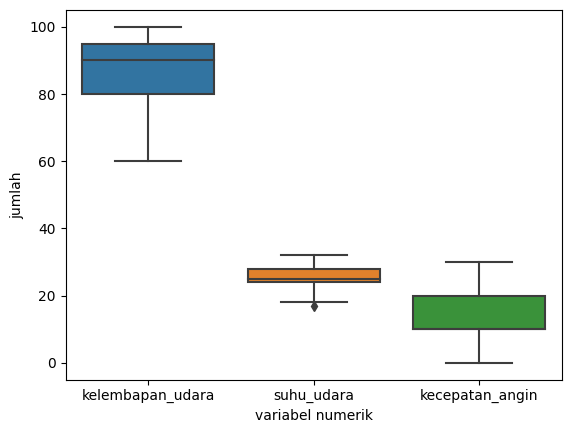

In [ ]:
#visualitation Numerical Valued importance column
sns.boxplot(x='variable', y='value', data=pd.melt(df_num)).set(
    xlabel='variabel numerik',
    ylabel='jumlah')

In [ ]:
Q1 = df['suhu_udara'].quantile(0.25)
Q3 = df['suhu_udara'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5*IQR
lower_bound = Q1 - 1.5*IQR

In [ ]:
#df = df[(df['suhu_udara'] > lower_bound) & (df['suhu_udara'] < upper_bound)]
#df.head(10)

In [ ]:
df_numeric=df[['kelembapan_udara','suhu_udara','kecepatan_angin']]
df_numeric

,kelembapan_udara,suhu_udara,kecepatan_angin
0,85,26,20
1,80,28,20
2,70,30,20
3,95,25,20
4,90,26,10
...,...,...,...
1875,90,23,10
1876,95,24,0
1877,85,27,10
1878,100,24,10


# **Korelasi**

In [ ]:
#Encode datatype use LabelEncoder
le = LabelEncoder()
var = ['lokasi','waktu','parameter_cuaca','arah_angin']
for i in var:
    df[i] = le.fit_transform(df[i])

In [ ]:
#correlation
# 0 no correlation
# 1 positive correlation
# -1 negative correlation

df_corr=df.corr()['parameter_cuaca'].sort_values().reset_index()
df_corr

,index,parameter_cuaca
0,kelembapan_udara,-0.116167
1,waktu,-0.063207
2,lokasi,-0.003437
3,arah_angin,0.074756
4,kecepatan_angin,0.090101
5,suhu_udara,0.130194
6,parameter_cuaca,1.000000


# **Split Dataset**

In [ ]:
#split dataset in features and target variable
y = df['parameter_cuaca']
x = df.drop(columns=['parameter_cuaca'])

In [ ]:
# split X and y into training and testing sets
x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, test_size=0.4, random_state=0)
x_train2, x_test2, y_train2, y_test2 = train_test_split(x, y, test_size=0.3, random_state=0)
x_train3, x_test3, y_train3, y_test3 = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
df_latih_A=pd.concat([y_train1,x_train1],axis=1, join='inner')
df_latih_B=pd.concat([y_train2,x_train2],axis=1, join='inner')
df_latih_C=pd.concat([y_train3,x_train3],axis=1, join='inner')
df_latih_A, df_latih_B, df_latih_C

(      parameter_cuaca  lokasi  waktu  kelembapan_udara  suhu_udara  \
 1002                6      27      2                60          31   
 1374                4      12      6                95          25   
 162                 7      24      2                65          31   
 1183                0      17      7                95          24   
 1765                6      44      5                90          26   
 ...               ...     ...    ...               ...         ...   
 835                 0      32      6                95          22   
 1216                0      16      0                80          27   
 1653                6       0      5                95          24   
 559                 0      39      6                90          24   
 684                 7      35      4                85          27   
 
       arah_angin  kecepatan_angin  
 1002           3               20  
 1374           6               10  
 162            6               20 

# **SMOTE**



In [ ]:
#Data A
columns_x1 = x_train1.columns
trainX1_smote ,trainY1_smote = SMOTE(k_neighbors = 3).fit_resample(x_train1, y_train1)
trainX1_smote = pd.DataFrame(data=trainX1_smote,columns=columns_x1)
trainY1_smote = pd.DataFrame(data=trainY1_smote,columns=['parameter_cuaca'])

#Data B
columns_x2 = x_train2.columns
trainX2_smote ,trainY2_smote = SMOTE(k_neighbors = 4).fit_resample(x_train2, y_train2)
trainX2_smote = pd.DataFrame(data=trainX2_smote,columns=columns_x2)
trainY2_smote = pd.DataFrame(data=trainY2_smote,columns=['parameter_cuaca'])

#Data C
columns_x3 = x_train3.columns
trainX3_smote ,trainY3_smote = SMOTE(k_neighbors = 4).fit_resample(x_train3, y_train3)
trainX3_smote = pd.DataFrame(data=trainX3_smote,columns=columns_x3)
trainY3_smote = pd.DataFrame(data=trainY3_smote,columns=['parameter_cuaca'])

In [ ]:
#Data setelah oversampling
df_latih_A_SMOTE=pd.concat([trainY1_smote,trainX1_smote],axis=1, join='inner')
df_latih_B_SMOTE=pd.concat([trainY2_smote,trainX2_smote],axis=1, join='inner')
df_latih_C_SMOTE=pd.concat([trainY3_smote,trainX3_smote],axis=1, join='inner')
df_latih_A_SMOTE, df_latih_B_SMOTE, df_latih_C_SMOTE

(      parameter_cuaca  lokasi  waktu  kelembapan_udara  suhu_udara  \
 0                   6      27      2                60          31   
 1                   4      12      6                95          25   
 2                   7      24      2                65          31   
 3                   0      17      7                95          24   
 4                   6      44      5                90          26   
 ...               ...     ...    ...               ...         ...   
 4145                9      13      0                97          24   
 4146                9      18      4                98          23   
 4147                9      33      4                95          20   
 4148                9      43      4                98          23   
 4149                9      33      0                95          23   
 
       arah_angin  kecepatan_angin  
 0              3               20  
 1              6               10  
 2              6               20 

# **Regresi Logistik**

In [ ]:
#Model RL
modelA = LogisticRegression(random_state=0, multi_class='multinomial', penalty='none', solver='newton-cg').fit(x_train1, y_train1)
modelB = LogisticRegression(random_state=0, multi_class='multinomial', penalty='none', solver='newton-cg').fit(x_train2, y_train2)
modelC = LogisticRegression(random_state=0, multi_class='multinomial', penalty='none', solver='newton-cg').fit(x_train3, y_train3)

#Parameter
paramsA = modelA.get_params()
paramsB = modelB.get_params()
paramsC = modelC.get_params()

print('Model A:\n Intercept: \n', modelA.intercept_)
print('Coefficients: \n', modelA.coef_)
print('\n\nModel B:\nIntercept: \n', modelB.intercept_)
print('Coefficients: \n', modelB.coef_)
print('\n\nModel C:\nIntercept: \n', modelC.intercept_)
print('Coefficients: \n', modelC.coef_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

Model A:
 Intercept: 
 [ 26.20619574   4.93593644  35.76268022  -4.24622898   8.06544502
   6.35107013   5.65128122  -7.84618164 -54.14937356 -20.73082458]
Coefficients: 
 [[ 2.29535649e-04 -1.27250431e-01 -2.05518312e-01 -1.01359677e-01
  -6.48435304e-02 -7.01298273e-02]
 [ 1.28107300e-03  7.21121635e-02 -1.04612258e-01  3.02091321e-01
  -2.64886190e-01 -1.69263767e-02]
 [-5.96242444e-03 -2.96433207e-01 -2.46957961e-01 -3.35309409e-01
   5.39156258e-02 -2.39311332e-01]
 [ 1.49109636e-02  4.42619849e-01 -1.22538760e-01  3.23596694e-01
   2.96445662e-01  3.08270631e-01]
 [-8.57194957e-03 -4.43157448e-01 -1.49004996e-02 -8.47001965e-03
   2.30594187e-02 -1.97283483e-01]
 [-8.76226185e-03 -4.91047845e-01 -4.17573145e-02  1.59919733e-01
  -1.32759702e-01 -1.88216262e-01]
 [ 9.15079702e-03  8.60527783e-01 -2.58535701e-01  5.14771269e-01
   3.95870821e-01 -6.70767939e-04]
 [-4.48119139e-03  5.68698999e-01 -1.38525902e-01  6.11879563e-01
   2.55576484e-01  1.83921695e-01]
 [ 6.28857243e-03 -1

/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


In [ ]:
#klasifikasi
y_pred1 = modelA.predict(x_test1)
y_pred2 = modelB.predict(x_test2)
y_pred3 = modelC.predict(x_test3)

#Confusion matrix
cnf_matrix_A = metrics.confusion_matrix(y_test1, y_pred1)
cnf_matrix_B = metrics.confusion_matrix(y_test2, y_pred2)
cnf_matrix_C = metrics.confusion_matrix(y_test3, y_pred3)
print('Model A:\n' , cnf_matrix_A)
print('Model B:\n' , cnf_matrix_B)
print('Model C:\n' , cnf_matrix_C)

Model A:
 [[224   0   0   1  29   0   7   2   0   0]
 [ 39   0   0   0   2   0   2   1   0   0]
 [ 25   0   0   1  14   0   1   2   0   0]
 [  7   0   0   5   0   0  12   5   0   0]
 [ 77   1   0   1  47   2   2   3   4   5]
 [ 30   0   0   0  21   1   0   1   2   1]
 [ 29   2   0   1   0   0  51   9   0   0]
 [ 19   1   0   4   0   0  27  10   0   0]
 [  0   0   0   0   2   0   0   0   1   0]
 [  5   0   0   0   8   0   0   0   3   3]]
Model B:
 [[170   0   0   0  26   0   8   2   0   0]
 [ 30   0   0   0   1   0   2   0   0   0]
 [ 19   0   0   1   7   0   2   0   0   0]
 [  4   0   0   2   0   0  12   5   0   0]
 [ 61   0   0   0  35   0   0   3   3   4]
 [ 19   0   0   0  14   1   0   1   2   0]
 [ 23   0   0   1   0   0  42   4   0   0]
 [ 16   0   0   1   0   0  20   6   0   0]
 [  0   0   0   0   2   0   0   0   0   0]
 [  6   0   0   0   5   0   0   0   3   1]]
Model C:
 [[124   0   0   0  19   0   6   1   0   0]
 [ 18   0   0   0   1   0   1   0   0   0]
 [ 12   0   0   0   6 

Text(0.5, 427.9555555555555, 'Clasified as')

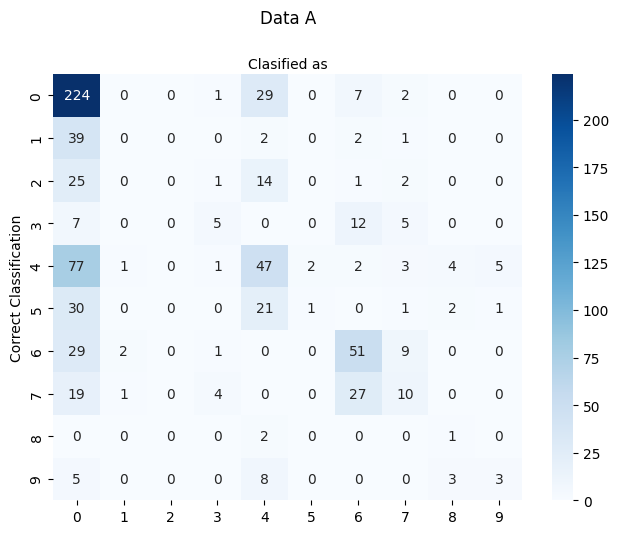

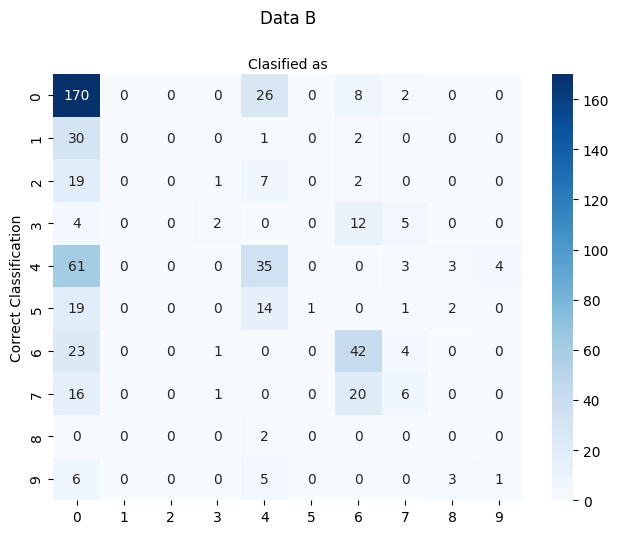

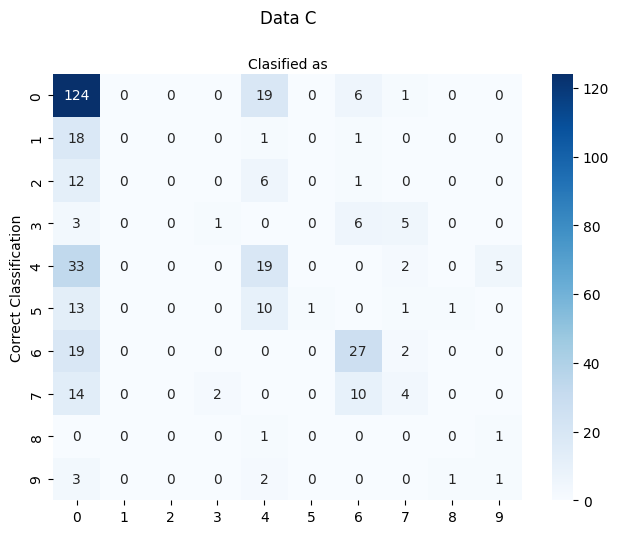

In [ ]:
class_names=[0,0]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix_A), annot=True, cmap="Blues" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Data A', y=1.1)
plt.ylabel('Correct Classification')
plt.xlabel('Clasified as')

class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix_B), annot=True, cmap="Blues" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Data B', y=1.1)
plt.ylabel('Correct Classification')
plt.xlabel('Clasified as')

class_names=[0,2]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix_C), annot=True, cmap="Blues" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Data C', y=1.1)
plt.ylabel('Correct Classification')
plt.xlabel('Clasified as')

In [ ]:
#%% ROC-AUC Curve
# Compute Micro-Average ROC curve and ROC area model A
label_binarizer= LabelBinarizer().fit(y_train1)
y_onehot_test1= label_binarizer.transform(y_test1)
y_onehot_pred1= label_binarizer.transform(y_pred1)
fpr_a = dict()
tpr_a = dict()
roc_auc_a = dict()
fpr_a['micro'], tpr_a['micro'],_=roc_curve(y_onehot_test1.ravel(),  y_onehot_pred1.ravel())
roc_auc_a['micro'] = auc(fpr_a['micro'], tpr_a['micro'])

# Compute Micro-Average ROC curve and ROC area model B
label_binarizer= LabelBinarizer().fit(y_train2)
y_onehot_test2= label_binarizer.transform(y_test2)
y_onehot_pred2= label_binarizer.transform(y_pred2)
fpr_b = dict()
tpr_b = dict()
roc_auc_b = dict()
fpr_b['micro'], tpr_b['micro'],_=roc_curve(y_onehot_test2.ravel(),  y_onehot_pred2.ravel())
roc_auc_b['micro'] = auc(fpr_b['micro'], tpr_b['micro'])

# Compute Micro-Average ROC curve and ROC area model C
label_binarizer= LabelBinarizer().fit(y_train3)
y_onehot_test3= label_binarizer.transform(y_test3)
y_onehot_pred3= label_binarizer.transform(y_pred3)
fpr_c = dict()
tpr_c = dict()
roc_auc_c = dict()
fpr_c['micro'], tpr_c['micro'],_=roc_curve(y_onehot_test3.ravel(),  y_onehot_pred3.ravel())
roc_auc_c['micro'] = auc(fpr_c['micro'], tpr_c['micro'])

#TPR, FPR, AUC
print('tpr_a:',tpr_a)
print('tpr_b:',tpr_b)
print('tpr_c:',tpr_c)
print('\nfpr_a:',fpr_a)
print('fpr_b:',fpr_b)
print('fpr_c:',fpr_c)
print('\nauc_a:',roc_auc_a)
print('auc_b:',roc_auc_b)
print('auc_c:',roc_auc_c)

tpr_a: {'micro': array([0.        , 0.45478723, 1.        ])}
tpr_b: {'micro': array([0.        , 0.45567376, 1.        ])}
tpr_c: {'micro': array([0.        , 0.47074468, 1.        ])}

fpr_a: {'micro': array([0.       , 0.0605792, 1.       ])}
fpr_b: {'micro': array([0.        , 0.06048069, 1.        ])}
fpr_c: {'micro': array([0.        , 0.05880615, 1.        ])}

auc_a: {'micro': 0.6971040189125295}
auc_b: {'micro': 0.6975965327029157}
auc_c: {'micro': 0.7059692671394799}


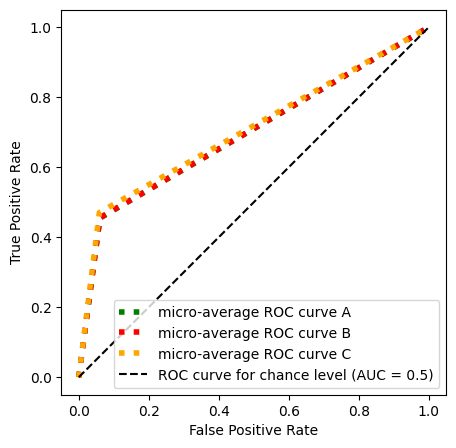

In [ ]:
# Plot ROC AUC
fig, ax = plt.subplots(figsize=(5, 5))

plt.plot(
    fpr_a["micro"],
    tpr_a["micro"],
    label=f"micro-average ROC curve A",
    color="green",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr_b["micro"],
    tpr_b["micro"],
    label=f"micro-average ROC curve B ",
    color="red",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr_c["micro"],
    tpr_c["micro"],
    label=f"micro-average ROC curve C ",
    color="orange",
    linestyle=":",
    linewidth=4,
)

plt.plot([0, 1], [0, 1], "k--", label="ROC curve for chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# **Regresi Logistik dengan SMOTE**

In [ ]:
#Model RL
modelA_smote = LogisticRegression(random_state=0, multi_class='multinomial', penalty='none', solver='newton-cg').fit(trainX1_smote, trainY1_smote)
modelB_smote = LogisticRegression(random_state=0, multi_class='multinomial', penalty='none', solver='newton-cg').fit(trainX2_smote, trainY2_smote)
modelC_smote = LogisticRegression(random_state=0, multi_class='multinomial', penalty='none', solver='newton-cg').fit(trainX3_smote, trainY3_smote)

#Parameter
paramsA_smote = modelA_smote.get_params()
paramsB_smote = modelB_smote.get_params()
paramsC_smote = modelC_smote.get_params()

print('Model A:\n Intercept: \n', modelA_smote.intercept_)
print('Coefficients: \n', modelA_smote.coef_)
print('\n\nModel B:\nIntercept: \n', modelB_smote.intercept_)
print('Coefficients: \n', modelB_smote.coef_)
print('\n\nModel C:\nIntercept: \n', modelC_smote.intercept_)
print('Coefficients: \n', modelC_smote.coef_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A col

Model A:
 Intercept: 
 [  42.75893539   27.4021568    67.62095714   29.32852839   29.45323583
   31.83030091   27.07155239   18.67330633 -270.7863761    -3.35259707]
Coefficients: 
 [[ 3.33273269e-04 -1.39426785e-01 -4.95273582e-01  3.95166173e-01
   1.04384217e-01 -1.56389222e-01]
 [ 9.63451368e-04  4.11718887e-04 -4.05799887e-01  6.94025874e-01
  -1.48136851e-01 -1.15440918e-01]
 [-4.81036605e-03 -3.69843050e-01 -5.99007915e-01 -1.28744961e-01
   2.28648063e-01 -3.70589838e-01]
 [ 1.23667553e-02  3.01387528e-01 -4.89258057e-01  4.94363468e-01
   5.58616454e-01  2.15640905e-01]
 [-3.85709676e-03 -5.87998377e-01 -3.04076659e-01  3.71960742e-01
   7.34772739e-02 -3.05081890e-01]
 [-1.40820245e-02 -6.67748569e-01 -3.44958999e-01  4.68115114e-01
  -7.65566670e-02 -2.93214041e-01]
 [ 2.25739192e-03  1.11186262e+00 -5.96695143e-01  9.72157843e-01
   6.45340143e-01 -7.92471056e-02]
 [-6.42122142e-03  4.08333714e-01 -4.66103432e-01  9.64940304e-01
   3.92914479e-01  5.60827887e-02]
 [ 2.03518

/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


In [ ]:
#klasifikasi
y_pred1_smote = modelA_smote.predict(x_test1)
y_pred2_smote = modelB_smote.predict(x_test2)
y_pred3_smote = modelC_smote.predict(x_test3)

#Confusion matrix
cnf_matrix_A_smote = metrics.confusion_matrix(y_test1, y_pred1_smote)
cnf_matrix_B_smote = metrics.confusion_matrix(y_test2, y_pred2_smote)
cnf_matrix_C_smote = metrics.confusion_matrix(y_test3, y_pred3_smote)
print('Model A:\n' , cnf_matrix_A_smote)
print('Model B:\n' , cnf_matrix_B_smote)
print('Model C:\n' , cnf_matrix_C_smote)

Model A:
 [[19 57 26 26 13 27 53 40  1  1]
 [ 1 19  2  3  2  2  4 10  0  1]
 [ 0  6 14  2  2  7  7  1  0  4]
 [ 0  0  0  9  0  0  9 11  0  0]
 [ 9 21 16 10 22 20 15  6  7 16]
 [ 5  1  4  7 13 18  0  0  3  5]
 [ 2 12  2 13  4  0 51  8  0  0]
 [ 4  1  2 18  0  0 24 12  0  0]
 [ 0  0  0  0  0  0  0  0  1  2]
 [ 0  3  2  0  1  0  0  0  4  9]]
Model B:
 [[19 57 15 25  5 24 36 20  1  4]
 [ 2 14  2  2  0  2  6  4  0  1]
 [ 1  4  9  2  1  3  6  0  0  3]
 [ 0  1  0  7  0  0  6  9  0  0]
 [ 6 16 11  9 10 22 10  4  4 14]
 [ 3  0  2  5  8 12  0  1  2  4]
 [ 2  7  2  4  3  0 44  8  0  0]
 [ 3  1  0  7  1  0 16 15  0  0]
 [ 0  0  0  0  0  0  0  0  0  2]
 [ 1  2  1  0  0  0  0  0  4  7]]
Model C:
 [[ 9 44  6 20  2 21 28 13  0  7]
 [ 0  8  1  2  0  2  4  2  0  1]
 [ 1  2  5  1  1  3  4  0  0  2]
 [ 0  0  0  6  0  0  2  7  0  0]
 [ 1 10  8  2  4 17  7  0  3  7]
 [ 2  0  2  4  4  9  0  0  1  4]
 [ 1  4  1  8  3  0 28  3  0  0]
 [ 2  0  0 11  1  0  9  7  0  0]
 [ 0  0  0  0  0  0  0  0  0  2]
 [ 0  2  0 

Text(0.5, 427.9555555555555, 'Clasified as')

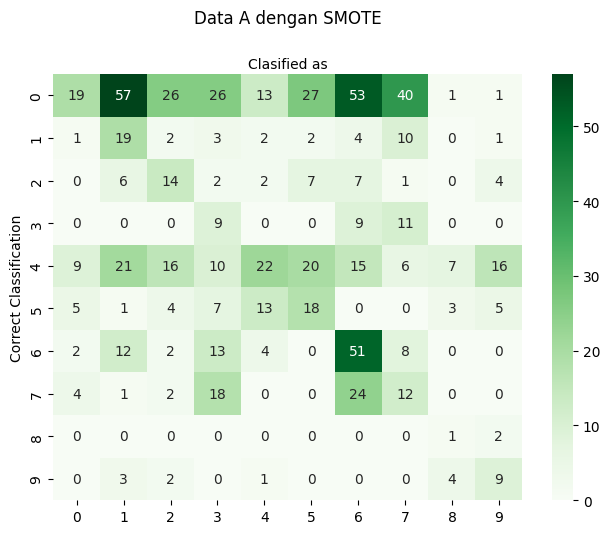

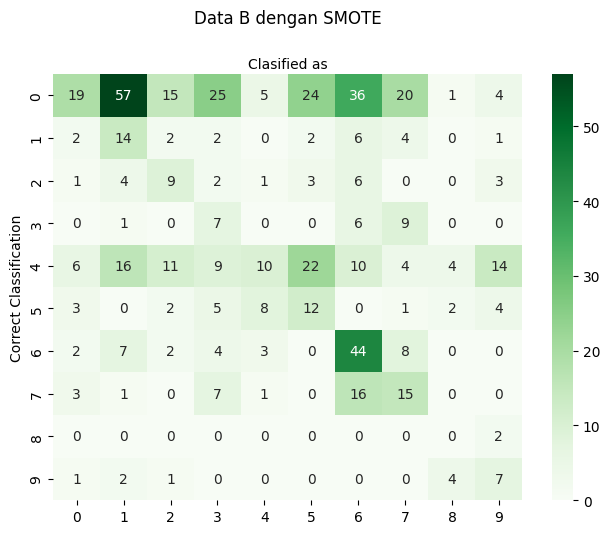

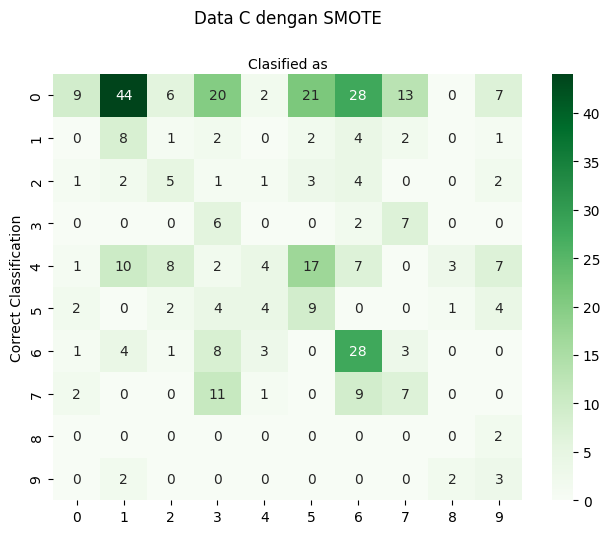

In [ ]:
class_names=[0,0]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix_A_smote), annot=True, cmap="Greens" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Data A dengan SMOTE', y=1.1)
plt.ylabel('Correct Classification')
plt.xlabel('Clasified as')

class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix_B_smote), annot=True, cmap="Greens" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Data B dengan SMOTE', y=1.1)
plt.ylabel('Correct Classification')
plt.xlabel('Clasified as')

class_names=[0,2]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix_C_smote), annot=True, cmap="Greens" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Data C dengan SMOTE', y=1.1)
plt.ylabel('Correct Classification')
plt.xlabel('Clasified as')

In [ ]:
#%% ROC-AUC Curve
# Compute Micro-Average ROC curve and ROC area model A after SMOTE
label_binarizer= LabelBinarizer().fit(trainY1_smote)
y_onehot_test1= label_binarizer.transform(y_test1)
y_onehot_pred1_smote= label_binarizer.transform(y_pred1_smote)
fpr_a_smote = dict()
tpr_a_smote = dict()
roc_auc_a_smote = dict()
fpr_a_smote['micro'], tpr_a_smote['micro'],_=roc_curve(y_onehot_test1.ravel(),  y_onehot_pred1_smote.ravel())
roc_auc_a_smote['micro'] = auc(fpr_a_smote['micro'], tpr_a_smote['micro'])

# Compute Micro-Average ROC curve and ROC area model B after SMOTE
label_binarizer= LabelBinarizer().fit(trainY2_smote)
y_onehot_test2= label_binarizer.transform(y_test2)
y_onehot_pred2_smote= label_binarizer.transform(y_pred2_smote)
fpr_b_smote = dict()
tpr_b_smote = dict()
roc_auc_b_smote = dict()
fpr_b_smote['micro'], tpr_b_smote['micro'],_=roc_curve(y_onehot_test2.ravel(),  y_onehot_pred2_smote.ravel())
roc_auc_b_smote['micro'] = auc(fpr_b_smote['micro'], tpr_b_smote['micro'])

# Compute Micro-Average ROC curve and ROC area model C after SMOTE
label_binarizer= LabelBinarizer().fit(trainY3_smote)
y_onehot_test3= label_binarizer.transform(y_test3)
y_onehot_pred3_smote= label_binarizer.transform(y_pred3_smote)
fpr_c_smote = dict()
tpr_c_smote = dict()
roc_auc_c_smote = dict()
fpr_c_smote['micro'], tpr_c_smote['micro'],_=roc_curve(y_onehot_test3.ravel(),  y_onehot_pred3_smote.ravel())
roc_auc_c_smote['micro'] = auc(fpr_c_smote['micro'], tpr_c_smote['micro'])

#TPR, FPR, AUC
print('tpr_a_smote:',tpr_a_smote)
print('tpr_b_smote:',tpr_b_smote)
print('tpr_c_smote:',tpr_c_smote)
print('\nfpr_a_smote:',fpr_a_smote)
print('fpr_b_smote:',fpr_b_smote)
print('fpr_c_smote:',fpr_c_smote)
print('\nauc_a_smote:',roc_auc_a_smote)
print('auc_b_smote:',roc_auc_b_smote)
print('auc_c_smote:',roc_auc_c_smote)

tpr_a_smote: {'micro': array([0.        , 0.23138298, 1.        ])}
tpr_b_smote: {'micro': array([0.       , 0.2429078, 1.       ])}
tpr_c_smote: {'micro': array([0.        , 0.21010638, 1.        ])}

fpr_a_smote: {'micro': array([0.        , 0.08540189, 1.        ])}
fpr_b_smote: {'micro': array([0.        , 0.08412136, 1.        ])}
fpr_c_smote: {'micro': array([0.        , 0.08776596, 1.        ])}

auc_a_smote: {'micro': 0.5729905437352246}
auc_b_smote: {'micro': 0.5793932230102443}
auc_c_smote: {'micro': 0.5611702127659576}


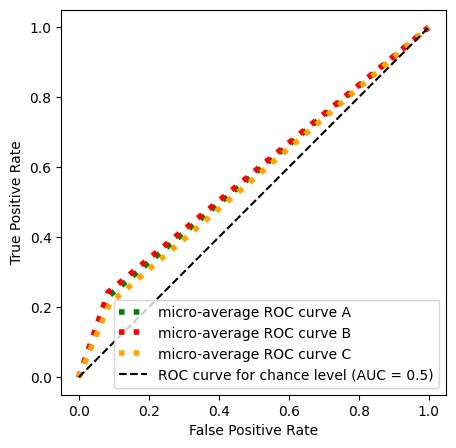

In [ ]:
# Plot ROC AUC
fig, ax = plt.subplots(figsize=(5, 5))

plt.plot(
    fpr_a_smote["micro"],
    tpr_a_smote["micro"],
    label=f"micro-average ROC curve A",
    color="green",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr_b_smote["micro"],
    tpr_b_smote["micro"],
    label=f"micro-average ROC curve B ",
    color="red",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr_c_smote["micro"],
    tpr_c_smote["micro"],
    label=f"micro-average ROC curve C ",
    color="orange",
    linestyle=":",
    linewidth=4,
)

plt.plot([0, 1], [0, 1], "k--", label="ROC curve for chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# **Random Forest**

In [ ]:
###Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=50,random_state=0)
##Train the model using the training sets y_pred=clf.predict(X_test)
#Model A:
clf.fit(x_train1,y_train1)
y_pred1=clf.predict(x_test1)
#Model B:
clf.fit(x_train2,y_train2)
y_pred2=clf.predict(x_test2)
#Model C:
clf.fit(x_train3,y_train3)
y_pred3=clf.predict(x_test3)

In [ ]:
#Model Evaluation using Confusion Matrix
cnf_matrix_A = metrics.confusion_matrix(y_test1, y_pred1)
cnf_matrix_B = metrics.confusion_matrix(y_test2, y_pred2)
cnf_matrix_C = metrics.confusion_matrix(y_test3, y_pred3)

In [ ]:
#%% ROC-AUC Curve
# Compute Micro-Average ROC curve and ROC area model A
label_binarizer= LabelBinarizer().fit(y_train1)
y_onehot_test1= label_binarizer.transform(y_test1)
y_onehot_pred1= label_binarizer.transform(y_pred1)
fpr_a = dict()
tpr_a = dict()
roc_auc_a = dict()
fpr_a['micro'], tpr_a['micro'],_=roc_curve(y_onehot_test1.ravel(),  y_onehot_pred1.ravel())
roc_auc_a['micro'] = auc(fpr_a['micro'], tpr_a['micro'])

# Compute Micro-Average ROC curve and ROC area model B
label_binarizer= LabelBinarizer().fit(y_train2)
y_onehot_test2= label_binarizer.transform(y_test2)
y_onehot_pred2= label_binarizer.transform(y_pred2)
fpr_b = dict()
tpr_b = dict()
roc_auc_b = dict()
fpr_b['micro'], tpr_b['micro'],_=roc_curve(y_onehot_test2.ravel(),  y_onehot_pred2.ravel())
roc_auc_b['micro'] = auc(fpr_b['micro'], tpr_b['micro'])

# Compute Micro-Average ROC curve and ROC area model C
label_binarizer= LabelBinarizer().fit(y_train3)
y_onehot_test3= label_binarizer.transform(y_test3)
y_onehot_pred3= label_binarizer.transform(y_pred3)
fpr_c = dict()
tpr_c = dict()
roc_auc_c = dict()
fpr_c['micro'], tpr_c['micro'],_=roc_curve(y_onehot_test3.ravel(),  y_onehot_pred3.ravel())
roc_auc_c['micro'] = auc(fpr_c['micro'], tpr_c['micro'])

#TPR, FPR, AUC
print('tpr_a:',tpr_a)
print('tpr_b:',tpr_b)
print('tpr_c:',tpr_c)
print('\nfpr_a:',fpr_a)
print('fpr_b:',fpr_b)
print('fpr_c:',fpr_c)
print('\nauc_a:',roc_auc_a)
print('auc_b:',roc_auc_b)
print('auc_c:',roc_auc_c)

tpr_a: {'micro': array([0.        , 0.48670213, 1.        ])}
tpr_b: {'micro': array([0.        , 0.49468085, 1.        ])}
tpr_c: {'micro': array([0.        , 0.52659574, 1.        ])}

fpr_a: {'micro': array([0.       , 0.0570331, 1.       ])}
fpr_b: {'micro': array([0.        , 0.05614657, 1.        ])}
fpr_c: {'micro': array([0.        , 0.05260047, 1.        ])}

auc_a: {'micro': 0.7148345153664302}
auc_b: {'micro': 0.7192671394799055}
auc_c: {'micro': 0.7369976359338062}


Text(0.5, 427.9555555555555, 'Clasified as')

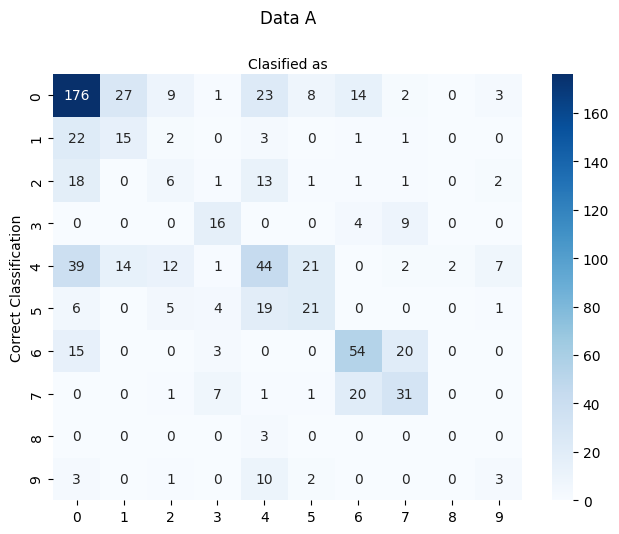

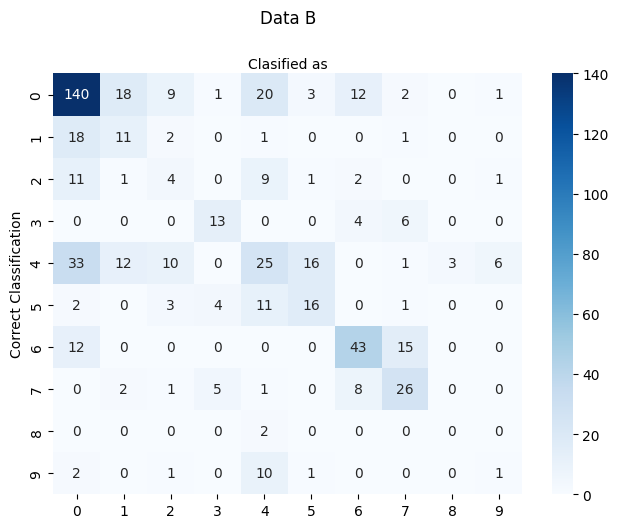

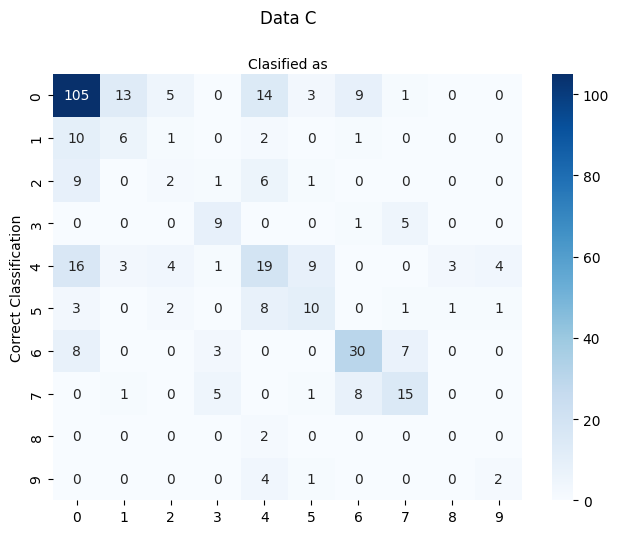

In [ ]:
class_names=[0,0]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix_A), annot=True, cmap="Blues" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Data A', y=1.1)
plt.ylabel('Correct Classification')
plt.xlabel('Clasified as')

class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix_B), annot=True, cmap="Blues" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Data B', y=1.1)
plt.ylabel('Correct Classification')
plt.xlabel('Clasified as')

class_names=[0,2]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix_C), annot=True, cmap="Blues" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Data C', y=1.1)
plt.ylabel('Correct Classification')
plt.xlabel('Clasified as')

# **Random Forest dengan SMOTE**

In [ ]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=50, random_state=0)
#Train the model using the training sets y_pred=clf.predict(X_test)
#model A with smote
clf.fit(trainX1_smote,trainY1_smote)
y_pred1_smote=clf.predict(x_test1)
#model B with smote
clf.fit(trainX2_smote,trainY2_smote)
y_pred2_smote=clf.predict(x_test2)
#model C with smote
clf.fit(trainX3_smote,trainY3_smote)
y_pred3_smote=clf.predict(x_test3)

<ipython-input-112-64c707e65d5b>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(trainX1_smote,trainY1_smote)
<ipython-input-112-64c707e65d5b>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(trainX2_smote,trainY2_smote)
<ipython-input-112-64c707e65d5b>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(trainX3_smote,trainY3_smote)


In [ ]:
#Model Evaluation using Confusion Matrix
cnf_matrix_A_smote = metrics.confusion_matrix(y_test1, y_pred1_smote)
cnf_matrix_B_smote = metrics.confusion_matrix(y_test2, y_pred2_smote)
cnf_matrix_C_smote = metrics.confusion_matrix(y_test3, y_pred3_smote)
print('Model A:\n' , cnf_matrix_A_smote)
print('Model B:\n' , cnf_matrix_B_smote)
print('Model C:\n' , cnf_matrix_C_smote)

Model A:
 [[153  34  15   2  31   6  16   2   0   4]
 [ 17  18   4   0   3   1   1   0   0   0]
 [ 10   2   9   1  17   2   0   1   0   1]
 [  0   0   0  15   0   0   5   9   0   0]
 [ 23  22  17   0  43  18   0   1   3  15]
 [  3   0   5   4  12  21   0   3   2   6]
 [  9   1   0   0   2   0  60  20   0   0]
 [  0   2   2   7   1   0  25  24   0   0]
 [  0   0   0   0   1   0   0   0   1   1]
 [  1   1   1   0   9   1   0   0   3   3]]
Model B:
 [[118  28  13   2  21   7  13   1   0   3]
 [ 14  14   3   0   1   0   0   1   0   0]
 [  7   0   8   1   9   1   0   1   0   2]
 [  0   0   0  11   0   0   6   6   0   0]
 [ 24  16  11   0  22  19   0   2   4   8]
 [  1   0   3   1   9  19   0   2   1   1]
 [  8   2   0   1   1   0  48  10   0   0]
 [  0   1   1   4   1   0  15  21   0   0]
 [  0   0   0   0   1   0   0   0   1   0]
 [  1   0   1   0   7   1   0   0   3   2]]
Model C:
 [[90 17 13  1 16  2  9  1  0  1]
 [ 8  6  3  0  2  0  1  0  0  0]
 [ 6  1  5  1  5  0  0  1  0  0]
 [ 0  0  

In [ ]:
#%% ROC-AUC Curve
# Compute Micro-Average ROC curve and ROC area model A after SMOTE
label_binarizer= LabelBinarizer().fit(trainY1_smote)
y_onehot_test1= label_binarizer.transform(y_test1)
y_onehot_pred1_smote= label_binarizer.transform(y_pred1_smote)
fpr_a_smote = dict()
tpr_a_smote = dict()
roc_auc_a_smote = dict()
fpr_a_smote['micro'], tpr_a_smote['micro'],_=roc_curve(y_onehot_test1.ravel(),  y_onehot_pred1_smote.ravel())
roc_auc_a_smote['micro'] = auc(fpr_a_smote['micro'], tpr_a_smote['micro'])

# Compute Micro-Average ROC curve and ROC area model B after SMOTE
label_binarizer= LabelBinarizer().fit(trainY2_smote)
y_onehot_test2= label_binarizer.transform(y_test2)
y_onehot_pred2_smote= label_binarizer.transform(y_pred2_smote)
fpr_b_smote = dict()
tpr_b_smote = dict()
roc_auc_b_smote = dict()
fpr_b_smote['micro'], tpr_b_smote['micro'],_=roc_curve(y_onehot_test2.ravel(),  y_onehot_pred2_smote.ravel())
roc_auc_b_smote['micro'] = auc(fpr_b_smote['micro'], tpr_b_smote['micro'])

# Compute Micro-Average ROC curve and ROC area model C after SMOTE
label_binarizer= LabelBinarizer().fit(trainY3_smote)
y_onehot_test3= label_binarizer.transform(y_test3)
y_onehot_pred3_smote= label_binarizer.transform(y_pred3_smote)
fpr_c_smote = dict()
tpr_c_smote = dict()
roc_auc_c_smote = dict()
fpr_c_smote['micro'], tpr_c_smote['micro'],_=roc_curve(y_onehot_test3.ravel(),  y_onehot_pred3_smote.ravel())
roc_auc_c_smote['micro'] = auc(fpr_c_smote['micro'], tpr_c_smote['micro'])

#TPR, FPR, AUC
print('tpr_a_smote:',tpr_a_smote)
print('tpr_b_smote:',tpr_b_smote)
print('tpr_c_smote:',tpr_c_smote)
print('\nfpr_a_smote:',fpr_a_smote)
print('fpr_b_smote:',fpr_b_smote)
print('fpr_c_smote:',fpr_c_smote)
print('\nauc_a_smote:',roc_auc_a_smote)
print('auc_b_smote:',roc_auc_b_smote)
print('auc_c_smote:',roc_auc_c_smote)

tpr_a_smote: {'micro': array([0.        , 0.46143617, 1.        ])}
tpr_b_smote: {'micro': array([0.        , 0.46808511, 1.        ])}
tpr_c_smote: {'micro': array([0.        , 0.48404255, 1.        ])}

fpr_a_smote: {'micro': array([0.        , 0.05984043, 1.        ])}
fpr_b_smote: {'micro': array([0.        , 0.05910165, 1.        ])}
fpr_c_smote: {'micro': array([0.        , 0.05732861, 1.        ])}

auc_a_smote: {'micro': 0.7007978723404256}
auc_b_smote: {'micro': 0.7044917257683215}
auc_c_smote: {'micro': 0.7133569739952719}


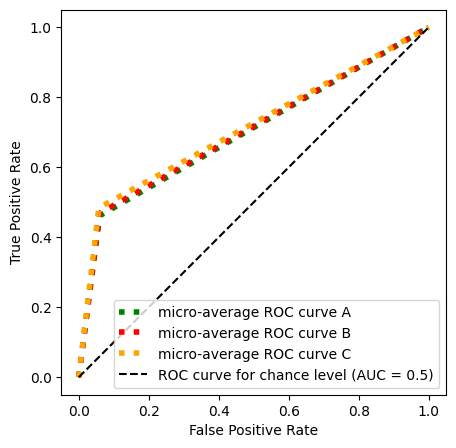

In [ ]:
# Plot ROC AUC
fig, ax = plt.subplots(figsize=(5, 5))

plt.plot(
    fpr_a_smote["micro"],
    tpr_a_smote["micro"],
    label=f"micro-average ROC curve A",
    color="green",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr_b_smote["micro"],
    tpr_b_smote["micro"],
    label=f"micro-average ROC curve B ",
    color="red",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr_c_smote["micro"],
    tpr_c_smote["micro"],
    label=f"micro-average ROC curve C ",
    color="orange",
    linestyle=":",
    linewidth=4,
)

plt.plot([0, 1], [0, 1], "k--", label="ROC curve for chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

Text(50.722222222222214, 0.5, 'Correct Classification')

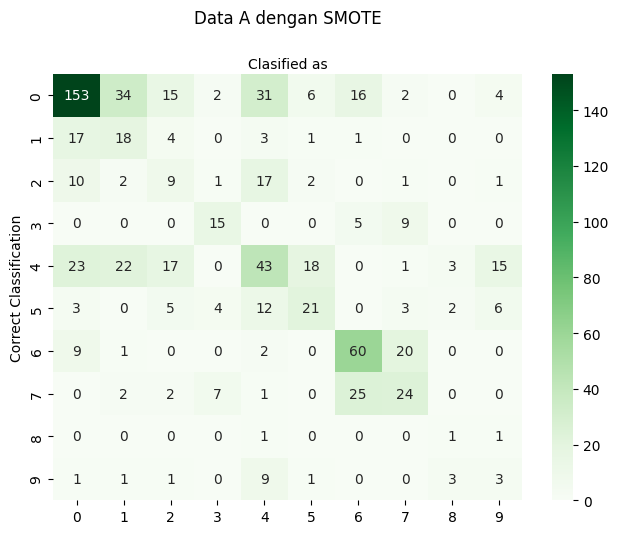

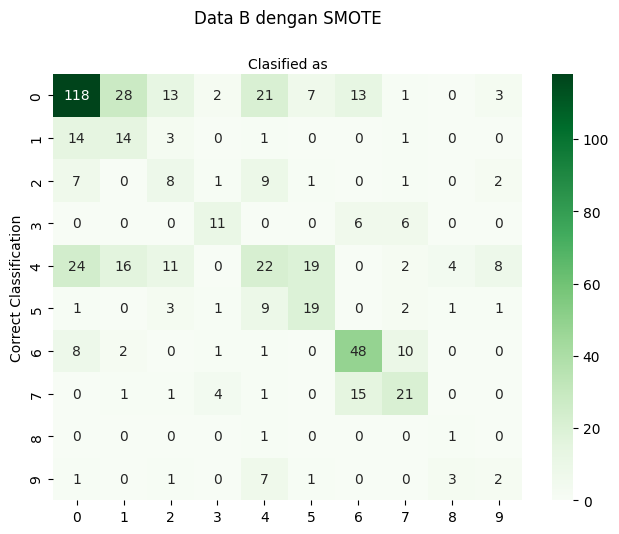

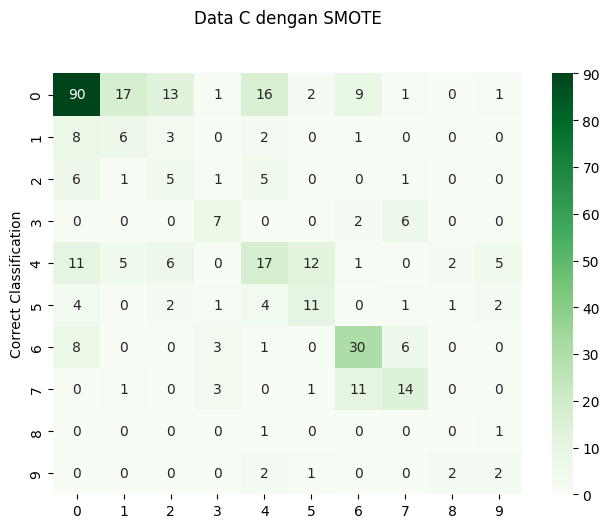

In [ ]:
class_names=[0,0]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix_A_smote), annot=True, cmap="Greens" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Data A dengan SMOTE', y=1.1)
plt.ylabel('Correct Classification')
plt.xlabel('Clasified as')

class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix_B_smote), annot=True, cmap="Greens" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Data B dengan SMOTE', y=1.1)
plt.ylabel('Correct Classification')
plt.xlabel('Clasified as')

class_names=[0,2]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix_C_smote), annot=True, cmap="Greens" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Data C dengan SMOTE', y=1.1)
plt.ylabel('Correct Classification')

In [ ]:
#df_latih_A_SMOTE.to_excel('Data latih SMOTE A.xlsx')
#df_latih_A_SMOTE.to_excel('/content/Data latih SMOTE A.xlsx', index=False)

#df_latih_B_SMOTE.to_excel('Data latih SMOTE B.xlsx')
#df_latih_B_SMOTE.to_excel('/content/Data latih SMOTE B.xlsx', index=False)

#df_latih_C_SMOTE.to_excel('Data latih SMOTE C.xlsx')
#df_latih_C_SMOTE.to_excel('/content/Data latih SMOTE C.xlsx', index=False)